# Çalışan İşten Ayrılma (turnover) Analizi

## Datasetinin Kaggle Adresi

https://www.kaggle.com/code/hafsahnahmad/hr-prediction-rf-vs-lr-vs-xgboost-vs-adaboost/data

## Kütüphaneleri Yükleyelim

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("/content/drive/MyDrive/machine_learning_projeleri/HR_comma_sep.csv")

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Column Description
* satisfacion_level: Showing satisfaction of a particular employee
* last_evaluation: Showing last evaluation of a particular employee
* number_project: Showing number of projects handled a particular employee
* average_montly_hours: Showing the monthly hours that were spent the particular emloyee
* time_spend_company: Shows the number of years spent by the particular employee in the company.
* Work_accident: Showing an employee has whether been part of the company or not.
* left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
* promotion_last_5years: Shows that the whether the employee has got any * promotion in the last 5 years or not.
* sales: Shows the departments
* salary: Shows the salary type of the employee

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Eksik Veri Analizi

In [19]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [20]:
df.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#  Keşifsel Veri Analizi

## Veri Görselleştirme

In [25]:
columns=df.columns

In [26]:
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

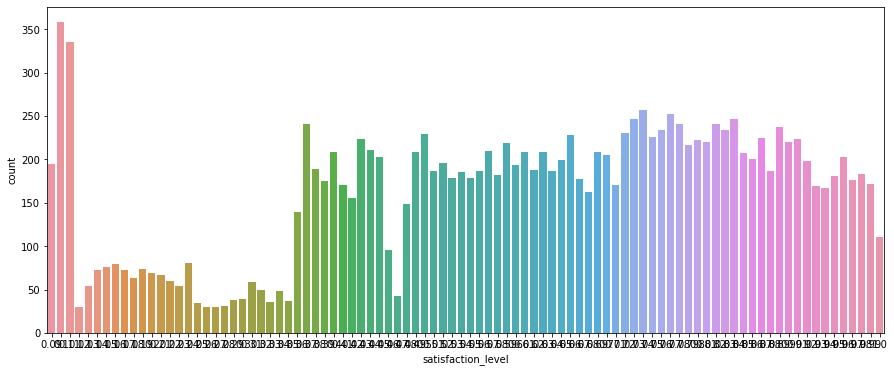

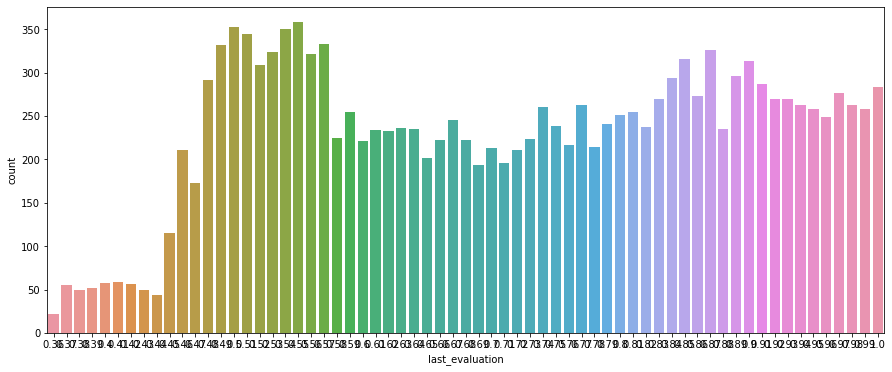

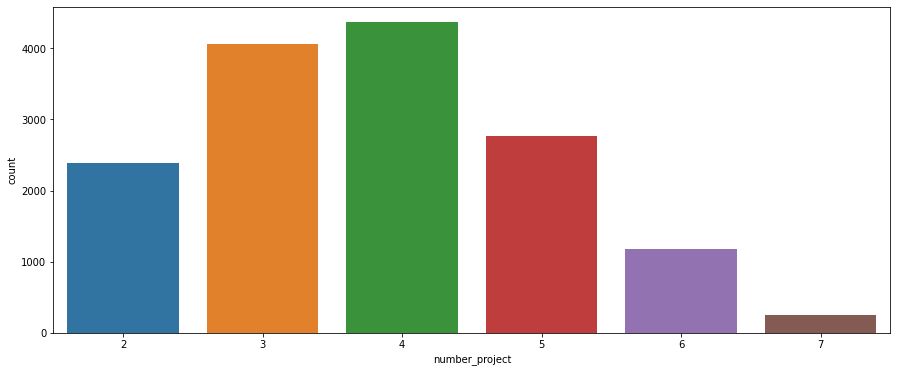

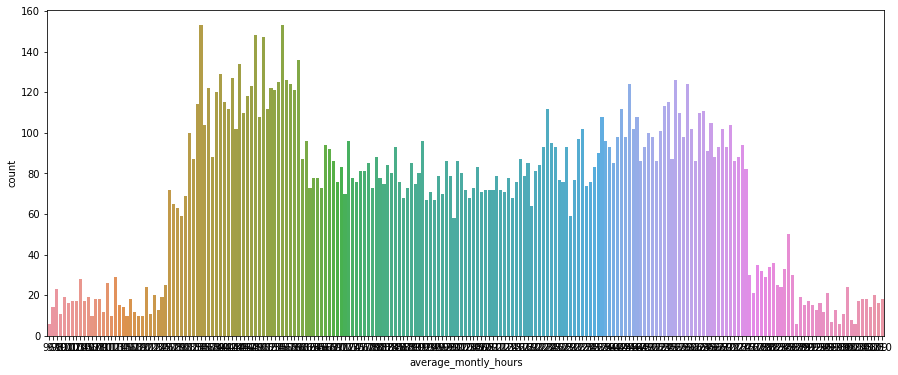

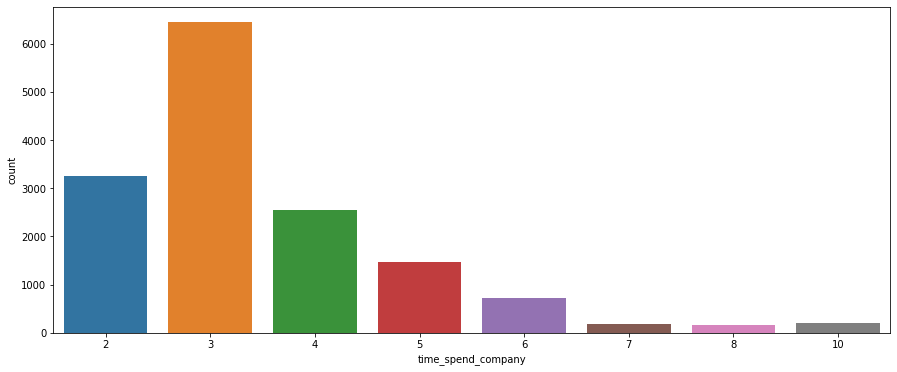

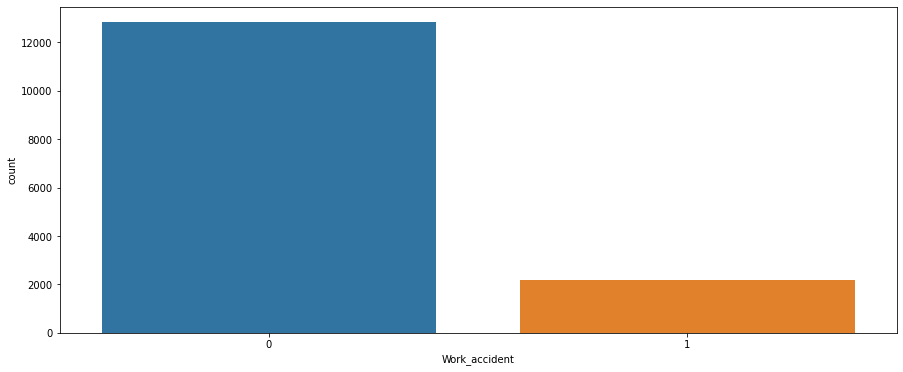

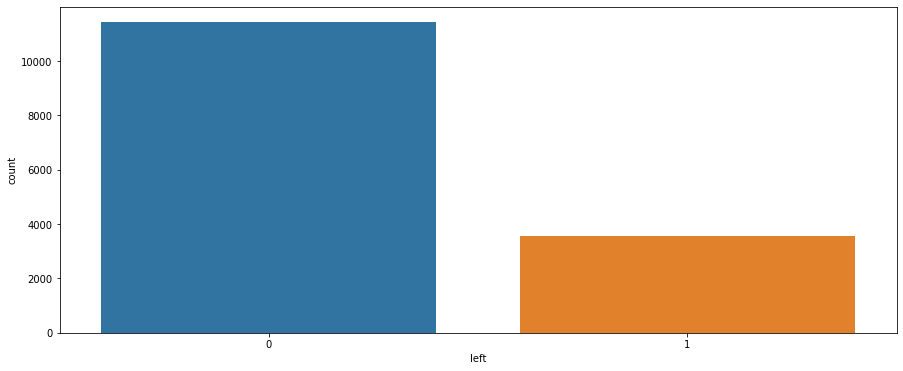

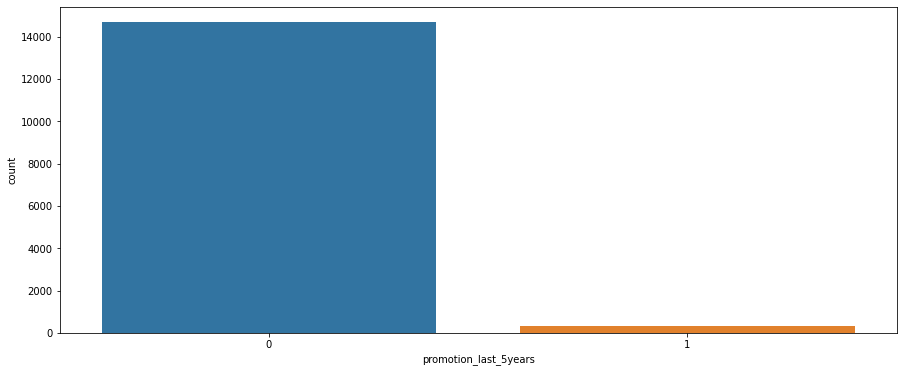

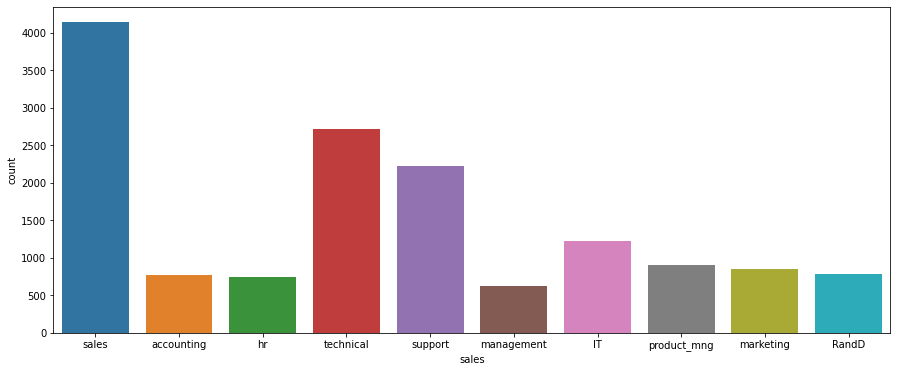

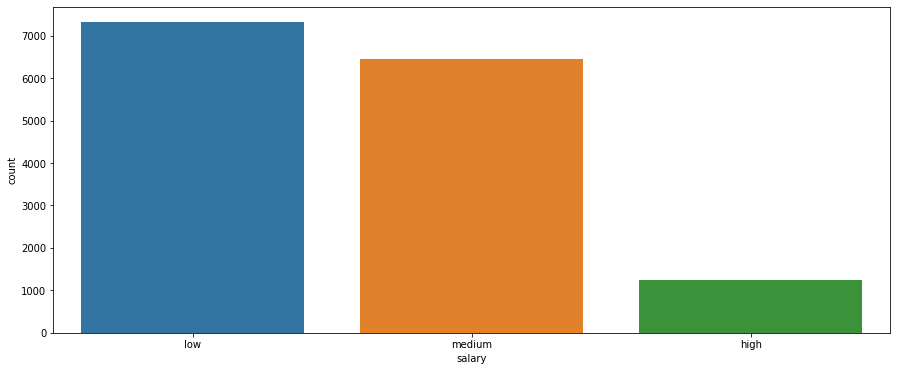

In [31]:
for i in columns:
  plt.figure(figsize=(15,6))
  sns.countplot(x=df[i], data=df)
  plt.show()

# kategorik verileri sayısal verilere dönüştürelim

In [32]:
df_kategorik=df.select_dtypes(include=["object"]).copy()

In [33]:
df_columns=df_kategorik.columns
df_columns

Index(['sales', 'salary'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe = LabelEncoder()
  df[i]=lbe.fit_transform(df[i])

In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


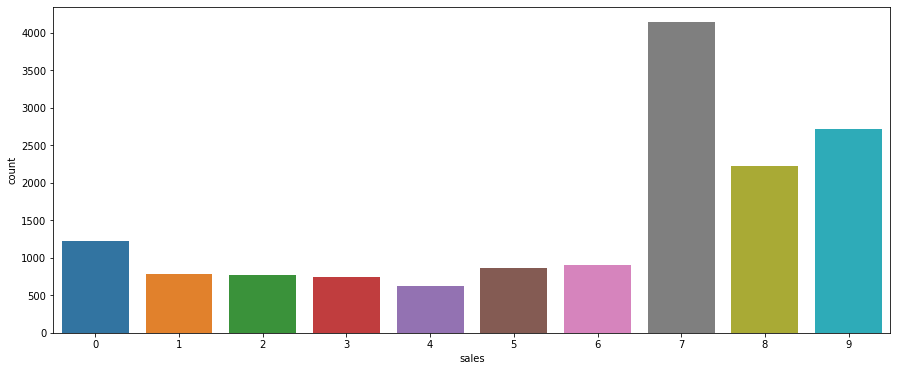

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["sales"], data=df)

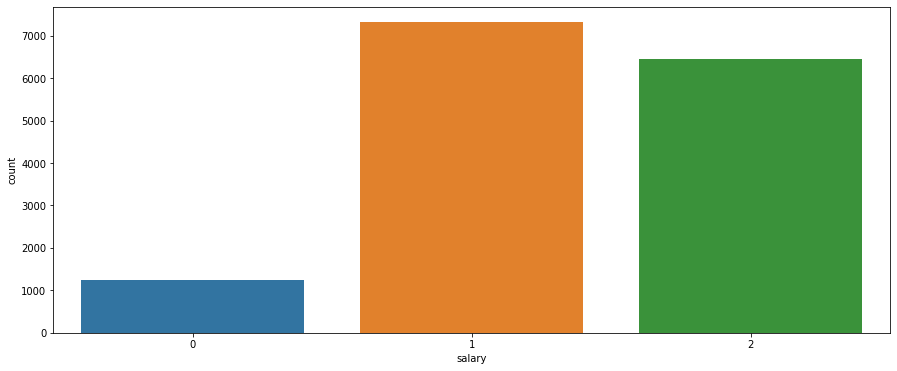

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["salary"], data=df)

## Machine Learning 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings("ignore")

In [49]:
y=df["left"]
X=df.drop(["left"], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

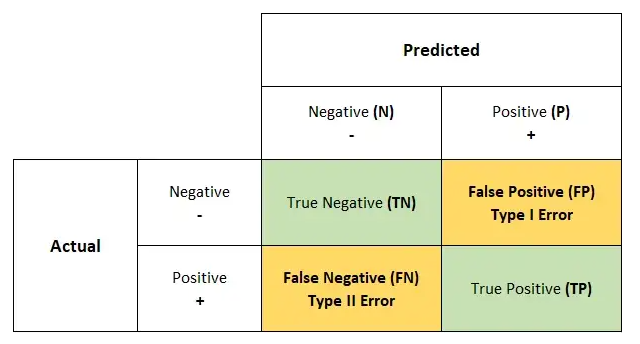

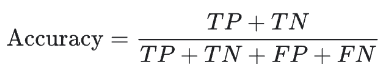

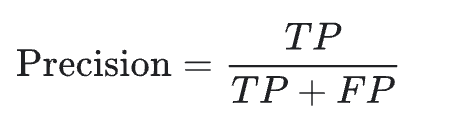

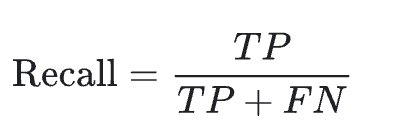

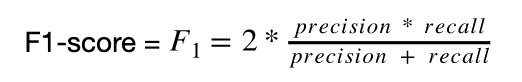

#Logistic Regression Classifier

In [68]:
log_model=LogisticRegression().fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_skor= accuracy_score(y_test,y_pred)
print('Logistic Model Dogrulugu:', loj_skor)

Logistic Model Dogrulugu: 0.7595555555555555


Text(0.5, 1.0, 'Model Accuracy:0.7595555555555555')

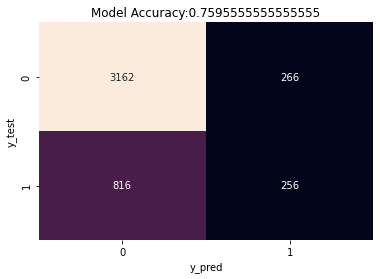

In [69]:
cf_matrix_log_model=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
log_model_score=accuracy_score(y_test, y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(log_model_score))

In [70]:
print("Logistic Regression Sınıflandırma Raporu")
print(classification_report(y_test, y_pred))


Logistic Regression Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



## SVM Classifier

In [74]:
SVM_model=SVC().fit(X_train,y_train)
y_pred=SVM_model.predict(X_test)
SVM_skor= accuracy_score(y_test,y_pred)
print('SVM Model Dogrulugu:', SVM_skor)

SVM Model Dogrulugu: 0.7846666666666666


Text(0.5, 1.0, 'Model Accuracy:0.7846666666666666')

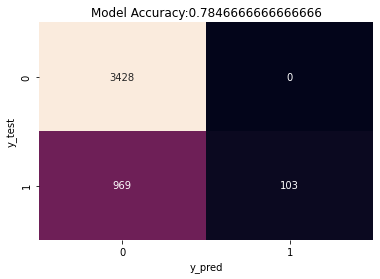

In [75]:
cf_matrix_SVM_model=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix_SVM_model,annot=True,cbar=False,fmt="g")
SVM_model_score=accuracy_score(y_test, y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(SVM_model_score))

In [76]:
print("SVM Sınıflandırma Raporu")
print(classification_report(y_test,y_pred))

SVM Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3428
           1       1.00      0.10      0.18      1072

    accuracy                           0.78      4500
   macro avg       0.89      0.55      0.53      4500
weighted avg       0.83      0.78      0.71      4500



## Decision Tree classifier

In [78]:
DT_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=DT_model.predict(X_test)
DT_skor= accuracy_score(y_test,y_pred)
print('DT Model Dogrulugu:', DT_skor)

DT Model Dogrulugu: 0.9748888888888889


Text(0.5, 1.0, 'Model Accuracy:0.9748888888888889')

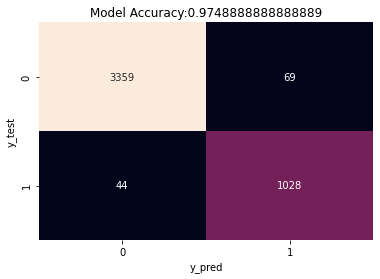

In [79]:
cf_matrix_DT_model=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix_DT_model,annot=True,cbar=False,fmt="g")
DT_model_score=accuracy_score(y_test, y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(DT_model_score))

In [80]:
print("DT Sınıflandırma Raporu")
print(classification_report(y_test,y_pred))

DT Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.96      0.95      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.97      0.97      4500



## Random Forest Classifier

In [82]:
RF_model=RandomForestClassifier().fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
RF_skor= accuracy_score(y_test,y_pred)
print('RF Model Dogrulugu:', RF_skor)

RF Model Dogrulugu: 0.9877777777777778


Text(0.5, 1.0, 'Model Accuracy:0.9877777777777778')

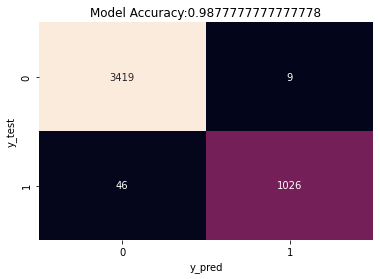

In [83]:
cf_matrix_RF_model=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix_RF_model,annot=True,cbar=False,fmt="g")
RF_model_score=accuracy_score(y_test, y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(RF_model_score))

In [84]:
print("Random Forest Sınıflandırma Raporu")
print(classification_report(y_test,y_pred))

Random Forest Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

